In [111]:
maze = []
start = (0, 0)
end = (0, 0)

import matplotlib.pyplot as plt
import numpy as np
import sys
sys.setrecursionlimit(10**9)

with open('example.txt') as f:
    for line in f:
        maze.append([0 if x == '#' else 2 for x in line.strip()])
        if 'S' in line:
            start = (len(maze) - 1, line.index('S'))
        if 'E' in line:
            end = (len(maze) - 1, line.index('E'))

solves = []
scores = {}
top_score = 0

def out_of_bounds(r, c):
    return r < 0 or r >= len(maze) or c < 0 or c >= len(maze[0])

def run(r, c, visited, turns):
    if (r, c) == end:
        for v in visited:
            score = scores.get(v, np.inf)
            if score > len(visited) + turns*1000:
                scores[v] = len(visited) + turns*1000
        solves.append(visited)
        return
    
    neighbors = [(r + 1, c), (r - 1, c), (r, c + 1), (r, c - 1)]
    for nr, nc in neighbors:
        if out_of_bounds(nr, nc) or maze[nr][nc] == 0 or (nr, nc) in visited:
            continue
        if scores.get((nr, nc), np.inf) + 1001 < len(visited) + turns*1000:
            continue
        if len(visited) > 1:
            v0 = visited[-2]
            v1 = visited[-1]
            d01 = v0[0] - v1[0], v0[1] - v1[1]
            d12 = v1[0] - nr, v1[1] - nc
            if d01 != d12:
                turns += 1

        run(nr, nc, visited + [(nr, nc)], turns)

run(start[0], start[1], [start], 0)
print(scores)

# turns are penalized, find out how many turns are in each solution
turns = []
for solve in solves:
    t = 0
    d = solve[0][0] - solve[1][0], solve[0][1] - solve[1][1]
    for i in range(1, len(solve)-1):
        d2 = solve[i][0] - solve[i + 1][0], solve[i][1] - solve[i + 1][1]
        if d != d2:
            t += 1
            d = d2

    turns.append(t)
# calculate scores

scores = []
for i in range(len(solves)):
    scores.append(len(solves[i]) + turns[i]*1000)

lowest_scores_i = []
min_score = min(scores)
for i in range(len(solves)):
    if scores[i] == min_score:
        lowest_scores_i.append(i)

print('Lowest score:', min_score)

lowest_score_tiles = list(set([x for sublist in [solves[i] for i in lowest_scores_i] for x in sublist]))
print(f'Lowest score tiles: {lowest_score_tiles}')
print(f"score: {len(lowest_score_tiles)}")


{(13, 1): 8037, (12, 1): 8037, (11, 1): 8037, (10, 1): 9037, (9, 1): 9037, (9, 2): 9037, (9, 3): 8037, (10, 3): 8037, (11, 3): 8037, (11, 4): 9037, (11, 5): 9037, (12, 5): 15053, (13, 5): 15053, (13, 6): 15053, (13, 7): 15053, (12, 7): 17053, (11, 7): 17053, (11, 8): 17053, (11, 9): 15053, (10, 9): 15053, (9, 9): 15053, (9, 8): 15053, (9, 7): 15053, (9, 6): 15053, (9, 5): 9037, (8, 5): 9037, (7, 5): 8037, (7, 6): 8037, (7, 7): 8037, (7, 8): 8037, (7, 9): 8037, (6, 9): 10029, (5, 9): 10029, (5, 10): 10029, (5, 11): 10029, (4, 11): 10029, (3, 11): 10029, (3, 10): 10029, (3, 9): 10029, (2, 9): 10029, (1, 9): 10029, (1, 10): 10029, (1, 11): 10029, (1, 12): 10029, (1, 13): 8037, (7, 10): 8037, (7, 11): 8037, (8, 11): 8037, (9, 11): 8037, (10, 11): 8037, (11, 11): 8037, (12, 11): 8037, (13, 11): 8037, (13, 12): 8037, (13, 13): 8037, (12, 13): 8037, (11, 13): 8037, (10, 13): 8037, (9, 13): 8037, (8, 13): 8037, (7, 13): 8037, (6, 13): 8037, (5, 13): 8037, (4, 13): 8037, (3, 13): 8037, (2, 13):

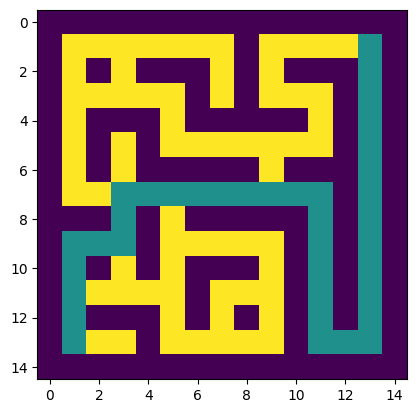

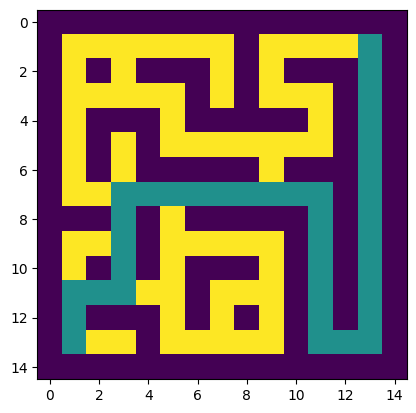

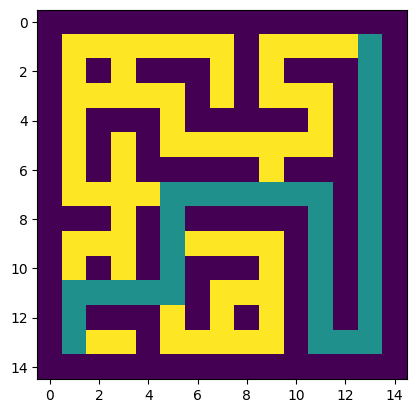

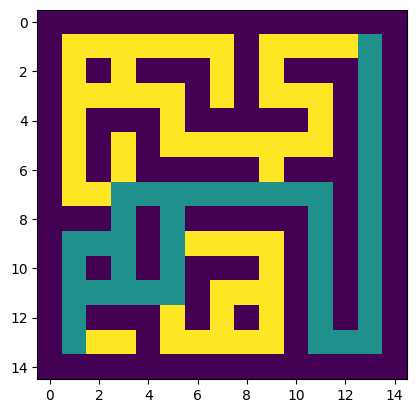

In [112]:
plt.imshow(maze)

for i in lowest_scores_i:
    for r, c in solves[i]:
        maze[r][c] = 1
    plt.imshow(maze)
    plt.show()

    for r, c in solves[i]:
        maze[r][c] = 2

for r, c in lowest_score_tiles:
    maze[r][c] = 1
    
plt.imshow(maze)
